In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the Dice

# 1 to 6 Fair
def sample_fair_dice():
  return np.random.randint(1, 7)

# 1 to 6 Biased
def sample_biased_dice():
  x = np.random.rand()

  if x < 0.4:
    return 1
  elif x<0.6:
    return 2
  elif x<0.75:
    return 3
  elif x < 0.85:
    return 4
  elif x < 0.95:
    return 5
  else:
    return 6

def fair_dice_prob(x):
  return 1/6

def biased_dice_prob(x):
  if x== 1:
    return 0.4
  elif x== 2:
    return 0.2
  elif x==3:
    return 0.15
  elif x==4:
    return 0.1
  elif x==5:
    return 0.1
  elif x==6:
    return 0.05

# sanity check
sum_fair = 0
sum_biased = 0
for i in range(1,7):
  sum_fair += fair_dice_prob(i)
  sum_biased += biased_dice_prob(i)

# can't check exactly == 1 because of numerical impercision
if np.abs(sum_fair - 1) > 1e-6:
  print("You made a dum-dum error in fair")

if np.abs(sum_biased - 1)> 1e-6:
  print("You made a dum-dum error in biased")

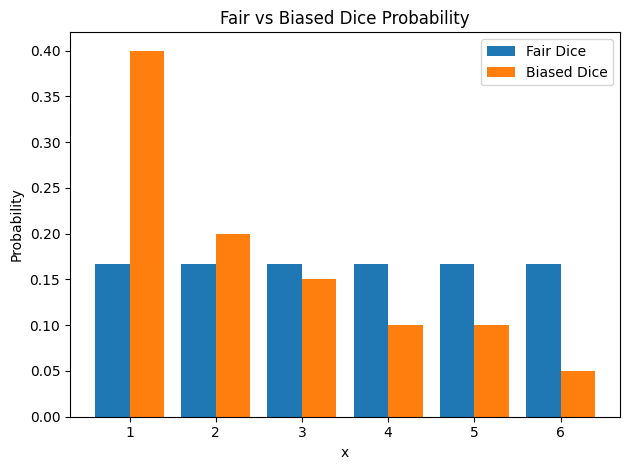

In [ ]:
# Plot distributions

x_s = np.arange(1,7)
p_fair = []
p_biased = []
for i in range(1,7):
  p_fair.append(fair_dice_prob(i))
  p_biased.append(biased_dice_prob(i))

plt.bar(x_s - 0.2, p_fair, width=0.4, align='center', label='Fair Dice')
plt.bar(x_s + 0.2, p_biased, width=0.4, align='center', label='Biased Dice')

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Fair vs Biased Dice Probability')
plt.xticks(x_s, x_s)  # Set x-axis ticks to match the outcomes
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# TRUE MEANS
mean_fair = 0
mean_biased = 0

for i in range(1,7):
  mean_fair += fair_dice_prob(i) * i
  mean_biased += biased_dice_prob(i) * i

print(f"Fair Dice Mean: {mean_fair}")
print(f"Biased Dice Mean: {mean_biased}")

if np.abs(mean_fair - mean_biased) > 1e-6:
  print("Notice they are not the same...")

Fair Dice Mean: 3.5
Biased Dice Mean: 2.45
Notice they are not the same...


In [ ]:
# params:

num_trials = 10000

In [ ]:
# GOAL 1 (As defined in video)

total = 0
for _ in range(num_trials):
  x = sample_fair_dice()
  f = fair_dice_prob(x)
  g = biased_dice_prob(x)
  w = g/f

  total += w*x

mu_estimate = total/num_trials
print(f"Estimated mean of biased die g(x) is: {mu_estimate}")
print(f"Error in estimate is: {np.abs(mean_biased - mu_estimate)}")

Estimated mean of biased die g(x) is: 2.451360000000158
Error in estimate is: 0.0013600000001576795


In [ ]:
# GOAL 2 (As defined in video)

samples_x = []
w_i = []
for _ in range(num_trials):
  x = sample_fair_dice()
  samples_x.append(x)
  w_i.append(biased_dice_prob(x)/fair_dice_prob(x))

w_i = np.array(w_i)
W = np.sum(w_i)
p_i = w_i/W

# compute direct expectation
mu_estimate_2 = 0
for i in range(num_trials):
  mu_estimate_2 += p_i[i] * samples_x[i]

print(f"Estimated mean of biased die g(x) is: {mu_estimate_2}")
print(f"Error in estimate is: {np.abs(mean_biased - mu_estimate_2)}")

Estimated mean of biased die g(x) is: 2.4530027680825897
Error in estimate is: 0.00300276808258948
